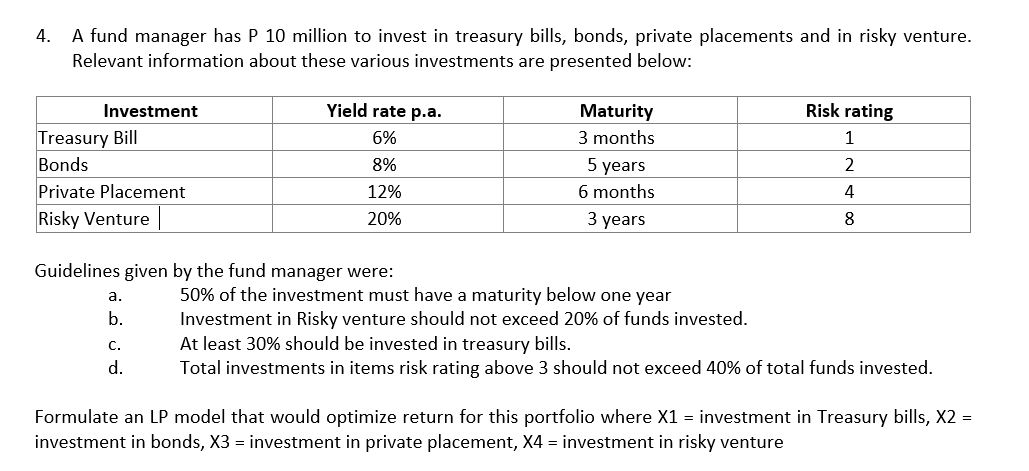

In [2]:
from pulp import *
import pandas as pd

In [3]:
infodf = pd.DataFrame({'Investment': ['Treasury Bills', 'Bonds', 'Private Placement', 'Risky Venture'],
                   'Yield Rate': [.06, .08, .12, .2],
                   'Maturity': [3, 60, 6, 36],
                   'Risk Rating': [1, 2, 4, 8]
                    })

print(infodf)

          Investment  Yield Rate  Maturity  Risk Rating
0     Treasury Bills        0.06         3            1
1              Bonds        0.08        60            2
2  Private Placement        0.12         6            4
3      Risky Venture        0.20        36            8


In [6]:
# Initialize the LP
prob = LpProblem('Fund Manager', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1,2,3,4], lowBound=0, cat='Integer') # Treasury Bills, Bonds, Private Placement, Risky Venture

# Objective Function
prob += 0.06 * x[1] + 0.08 * x[2] + 0.12 * x[3] + 0.20 * x[4], "Maximum Return" # Max Return

# Add Constraints
investment = 10000000
prob += x[1] + x[2] + x[3] + x[4] <= investment
prob += x[1] + x[3] <= .5 * investment
prob += x[4] <= .2 * investment
prob += x[1] >= .3 * investment
prob += x[3] + x[4] <= .4 * investment

print(prob)

# Solve the problem
status = prob.solve()
print(LpStatus[status])

#Display variables
for var in prob.variables():
    print(f"{var.name} = {var.varValue}")

#Display objective
max_return = value(prob.objective)
print(f"max return = {round(max_return, 2)}")

Fund_Manager:
MAXIMIZE
0.06*x_1 + 0.08*x_2 + 0.12*x_3 + 0.2*x_4 + 0.0
SUBJECT TO
_C1: x_1 + x_2 + x_3 + x_4 <= 10000000

_C2: x_1 + x_3 <= 5000000

_C3: x_4 <= 2000000

_C4: x_1 >= 3000000

_C5: x_3 + x_4 <= 4000000

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/0974cf14169848cbaa1d7618d9f7c874-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/0974cf14169848cbaa1d7618d9f7c874-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 33 RHS
At line 39 BOUNDS
At line 44 ENDATA
Problem MODEL has 5 rows, 4 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
